In [312]:
#!pip install numpy
#!pip install pandas
#!pip install -U matplotlib
#!pip install scipy
#!pip install seaborn
#!pip install pathlib

# 1. Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from pathlib import Path  

# 2. Functions

In [23]:
def df_treshold(df):
    '''
    Allows to have the upper and lower whisker of a boxplot 
    '''
    cols_use = set(df.columns) - {'Unnamed: 0', 'mapped_veh_id', 'timestamps_UTC', 'lat', 'lon','period'}
    df['period_m'] = df['period_m'].str[:4].astype(int)*100 +  df['period_m'].str[6:7].astype(int)
    df = df[df['period_m']>=202301]
    dfQuantil = df[list(cols_use)].describe(percentiles =[0.05, .25, .75, 0.9])
    q5 = dfQuantil.loc[['5%']].values.flatten().tolist()
    q25 = dfQuantil.loc[['25%']].values.flatten().tolist()
    q75 = dfQuantil.loc[['75%']].values.flatten().tolist()
    q90 = dfQuantil.loc[['90%']].values.flatten().tolist()
    lim_inf = [w - 1.5*(y-x) for w, x, y, z in zip(q5, q25, q75, q90)]
    lim_sup = [z + 1.5*(y-x) for w, x, y, z in zip(q5, q25, q75, q90)]
    dfQuantil.loc['lim_inf'] = lim_inf
    dfQuantil.loc['lim_sup'] = lim_sup
    return dfQuantil.loc[['lim_inf','lim_sup'],['RS_E_InAirTemp_PC1','RS_E_RPM_PC1','RS_E_WatTemp_PC1','RS_T_OilTemp_PC1','RS_E_OilPress_PC1']]

In [24]:
# cols_use = set(dfIni.columns) - {'Unnamed: 0', 'mapped_veh_id', 'timestamps_UTC', 'lat', 'lon','period'}
# dfIni[list(cols_use)].describe(percentiles =[0.05, .25, .75, 0.9])

In [25]:
# #dfIni.head(3)

# #dfIni['period_m'] = dfIni['period_m'].str[:4].astype(int)*100 +  dfIni['period_m'].str[6:7].astype(int)
# dfIni.info()

In [26]:
def limit_table_sup(df, limit_airTemp, limit_rpm, limit_waterT, limit_oilT, limit_oilP):
    '''
    Detect how many upper outilers we have per day and vehicule
    '''
    df['period'] = df['timestamps_UTC'].str[:10]
    dfAgg = df.groupby(['period','mapped_veh_id'],as_index=False)\
        .agg(
            RS_E_InAirTemp_PC1 = ('RS_E_InAirTemp_PC1', lambda x: (x>=limit_airTemp).sum()),
            RS_E_InAirTemp_PC2 = ('RS_E_InAirTemp_PC2', lambda x: (x>=limit_airTemp).sum()),
            RS_E_RPM_PC1 = ('RS_E_RPM_PC1', lambda x: (x>=limit_rpm).sum()),
            RS_E_RPM_PC2 = ('RS_E_RPM_PC2', lambda x: (x>=limit_rpm).sum()),
            RS_E_WatTemp_PC1 = ('RS_E_WatTemp_PC1', lambda x: (x>=limit_waterT).sum()),
            RS_E_WatTemp_PC2 = ('RS_E_WatTemp_PC2', lambda x: (x>=limit_waterT).sum()),
            RS_T_OilTemp_PC1 = ('RS_T_OilTemp_PC1', lambda x: (x>=limit_oilT).sum()),
            RS_T_OilTemp_PC2 = ('RS_T_OilTemp_PC2', lambda x: (x>=limit_oilT).sum()),
            RS_E_OilPress_PC1 = ('RS_E_OilPress_PC1', lambda x: (x>=limit_oilP).sum()),
            RS_E_OilPress_PC2 = ('RS_E_OilPress_PC2', lambda x: (x>=limit_oilP).sum())
            )
    cond_1 = (dfAgg['RS_E_InAirTemp_PC1']>1)
    cond_2 = (dfAgg['RS_E_InAirTemp_PC2']>1)
    cond_3 = (dfAgg['RS_E_RPM_PC1']>1)
    cond_4 = (dfAgg['RS_E_RPM_PC2']>1)
    cond_5 = (dfAgg['RS_E_WatTemp_PC1']>1)
    cond_6 = (dfAgg['RS_E_WatTemp_PC2']>1)
    cond_7 = (dfAgg['RS_T_OilTemp_PC1']>1)
    cond_8 = (dfAgg['RS_T_OilTemp_PC2']>1)
    cond_9 = (dfAgg['RS_E_OilPress_PC1']>1)
    cond_10 = (dfAgg['RS_E_OilPress_PC2']>1)
    conditions = (cond_1 | cond_2 | cond_3 | cond_4 | cond_5 | cond_6 | cond_7 | cond_8 | cond_9 | cond_10 )
    dfAgg  = dfAgg[conditions].reset_index(drop=True)
    return dfAgg

In [4]:
def limit_table_inf(df, limit_airTemp, limit_rpm, limit_waterT, limit_oilT, limit_oilP):
    '''
    Detect how many upper outilers we have per day and vehicule
    '''
    df['period'] = df['timestamps_UTC'].str[:10]
    dfAgg = df.groupby(['period','mapped_veh_id'],as_index=False)\
        .agg(
            RS_E_InAirTemp_PC1 = ('RS_E_InAirTemp_PC1', lambda x: (x<=limit_airTemp).sum()),
            RS_E_InAirTemp_PC2 = ('RS_E_InAirTemp_PC2', lambda x: (x<=limit_airTemp).sum()),
            RS_E_RPM_PC1 = ('RS_E_RPM_PC1', lambda x: (x<=limit_rpm).sum()),
            RS_E_RPM_PC2 = ('RS_E_RPM_PC2', lambda x: (x<=limit_rpm).sum()),
            RS_E_WatTemp_PC1 = ('RS_E_WatTemp_PC1', lambda x: (x<=limit_waterT).sum()),
            RS_E_WatTemp_PC2 = ('RS_E_WatTemp_PC2', lambda x: (x<=limit_waterT).sum()),
            RS_T_OilTemp_PC1 = ('RS_T_OilTemp_PC1', lambda x: (x<=limit_oilT).sum()),
            RS_T_OilTemp_PC2 = ('RS_T_OilTemp_PC2', lambda x: (x<=limit_oilT).sum()),
            RS_E_OilPress_PC1 = ('RS_E_OilPress_PC1', lambda x: (x<=limit_oilP).sum()),
            RS_E_OilPress_PC2 = ('RS_E_OilPress_PC2', lambda x: (x<=limit_oilP).sum())
            )
    cond_1 = (dfAgg['RS_E_InAirTemp_PC1']>1)
    cond_2 = (dfAgg['RS_E_InAirTemp_PC2']>1)
    cond_3 = (dfAgg['RS_E_RPM_PC1']>1)
    cond_4 = (dfAgg['RS_E_RPM_PC2']>1)
    cond_5 = (dfAgg['RS_E_WatTemp_PC1']>1)
    cond_6 = (dfAgg['RS_E_WatTemp_PC2']>1)
    cond_7 = (dfAgg['RS_T_OilTemp_PC1']>1)
    cond_8 = (dfAgg['RS_T_OilTemp_PC2']>1)
    cond_9 = (dfAgg['RS_E_OilPress_PC1']>1)
    cond_10 = (dfAgg['RS_E_OilPress_PC2']>1)
    conditions = (cond_1 | cond_2 | cond_3 | cond_4 | cond_5 | cond_6 | cond_7 | cond_8 | cond_9 | cond_10 )
    dfAgg  = dfAgg[conditions].reset_index(drop=True)
    return dfAgg

# 3. EDA

In [27]:
path = ''
file = 'ar41_for_ulb.csv'

In [28]:
dfIni = pd.read_csv(path + file, delimiter =';')
# Drop index col
dfIni.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
dfIni.shape

(17679273, 14)

In [5]:
dfIni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17679273 entries, 0 to 17679272
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   mapped_veh_id       float64
 2   timestamps_UTC      object 
 3   lat                 float64
 4   lon                 float64
 5   RS_E_InAirTemp_PC1  float64
 6   RS_E_InAirTemp_PC2  float64
 7   RS_E_OilPress_PC1   float64
 8   RS_E_OilPress_PC2   float64
 9   RS_E_RPM_PC1        float64
 10  RS_E_RPM_PC2        float64
 11  RS_E_WatTemp_PC1    float64
 12  RS_E_WatTemp_PC2    float64
 13  RS_T_OilTemp_PC1    float64
 14  RS_T_OilTemp_PC2    float64
dtypes: float64(13), int64(1), object(1)
memory usage: 2.0+ GB


In [8]:
cols_include = set(dfIni.columns) - {'Unnamed: 0', 'mapped_veh_id', 'timestamps_UTC', 'lat', 'lon'}
dfIni[list(cols_include)].describe()

,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_T_OilTemp_PC1,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_WatTemp_PC1,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_T_OilTemp_PC2,RS_E_WatTemp_PC2
count,1.767927e+07,1.766655e+07,1.767927e+07,1.767927e+07,1.766655e+07,1.767927e+07,1.767927e+07,1.766655e+07,1.766655e+07,1.766655e+07
mean,2.636115e+02,2.706874e+02,7.654693e+01,3.202422e+01,3.233414e+01,7.693166e+01,9.122489e+02,9.079636e+02,7.616182e+01,7.614234e+01
std,1.152382e+02,1.161168e+02,1.450369e+01,3.280040e+02,3.479992e+02,1.365462e+01,3.833051e+02,3.884709e+02,1.535040e+01,1.452870e+01
min,0.000000e+00,0.000000e+00,-1.280000e+02,0.000000e+00,0.000000e+00,-1.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-1.700000e+01
25%,2.030000e+02,2.100000e+02,7.400000e+01,2.200000e+01,2.200000e+01,7.700000e+01,7.970000e+02,7.970000e+02,7.400000e+01,7.600000e+01
50%,2.380000e+02,2.480000e+02,8.100000e+01,3.200000e+01,3.300000e+01,8.100000e+01,8.010000e+02,8.010000e+02,8.100000e+01,8.100000e+01
75%,3.200000e+02,3.310000e+02,8.500000e+01,4.000000e+01,3.900000e+01,8.400000e+01,8.120000e+02,8.110000e+02,8.500000e+01,8.400000e+01
max,6.900000e+02,6.900000e+02,1.270000e+02,6.553500e+04,6.553500e+04,1.090000e+02,2.309000e+03,9.732000e+03,1.170000e+02,1.190000e+02


/var/folders/1p/dqqj1xs55kn1fkmpx_k6bptw0000gn/T/ipykernel_1405/1271157403.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  .plot(ax=ax, kind= 'box', subplots=True, layout=(6,5))


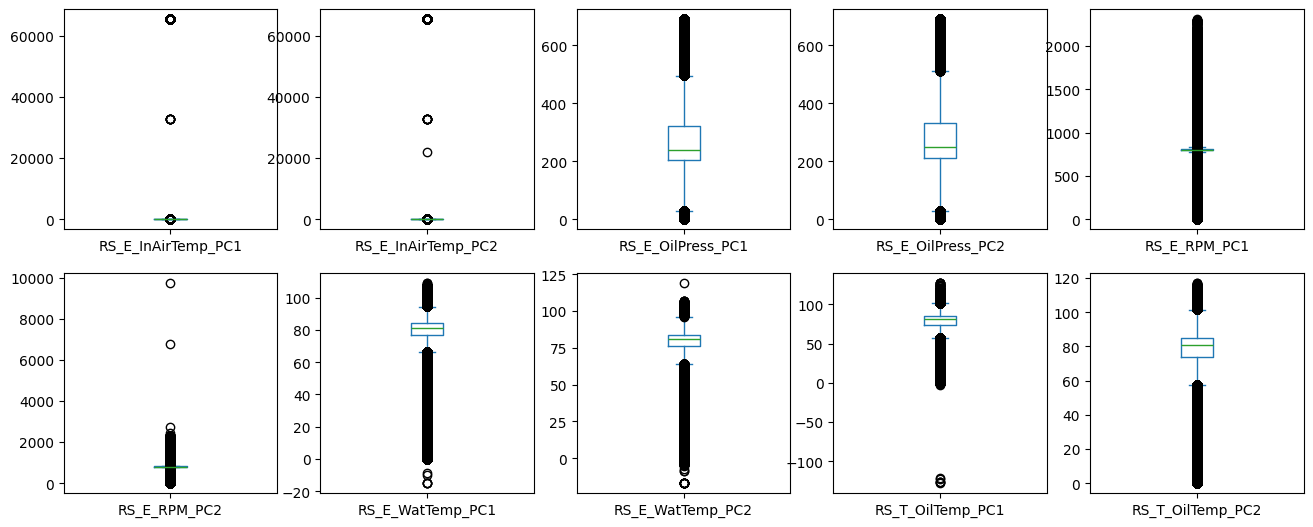

In [7]:
fig = plt.figure(figsize = (16,20))
ax = fig.gca()
(dfIni[list(cols_exclude)].rename(columns=lambda x: str(x)).sort_index(axis=1)
        .plot(ax=ax, kind= 'box', subplots=True, layout=(6,5))
)
plt.show()

We have outliers present in the data, this could be due a missreadings of the sensors

/var/folders/1p/dqqj1xs55kn1fkmpx_k6bptw0000gn/T/ipykernel_1405/704732029.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dfIni[list(cols_exclude)].sort_index(axis=1).plot(ax=ax, kind='density', subplots=True, layout=(5,5), sharex=False, legend=True)


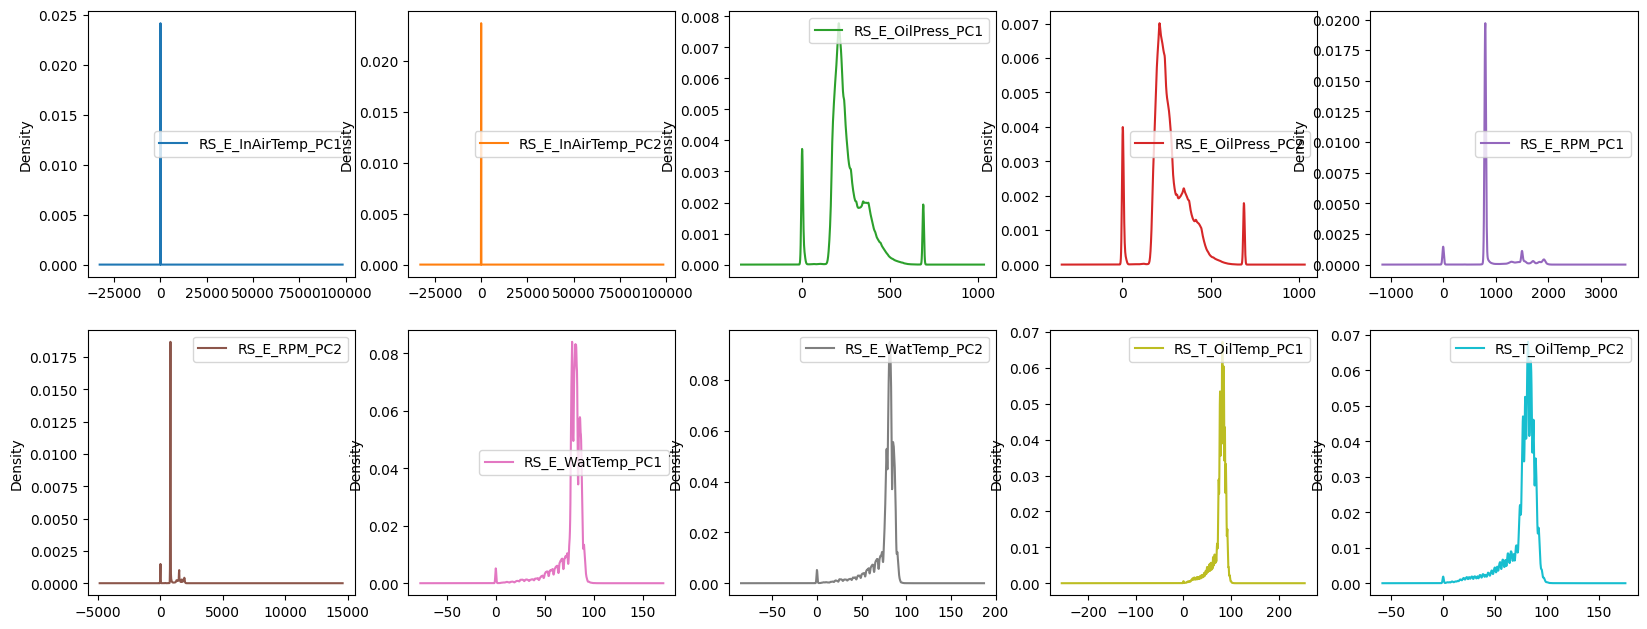

In [8]:
# density
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
dfIni[list(cols_exclude)].sort_index(axis=1).plot(ax=ax, kind='density', subplots=True, layout=(5,5), sharex=False, legend=True)
plt.show()

In [268]:
# number of trains
trains = dfIni.mapped_veh_id.unique()
print(trains, '\n\n number of trains', len(trains)) 

[181. 143. 183. 177. 121. 136. 172. 180. 151. 128. 182. 194. 134. 140.
 161. 142. 166. 176. 178. 145. 125. 152. 154. 109. 146. 170. 106. 188.
 157. 103. 171. 138. 137. 112. 179. 190. 122. 102. 141. 189. 173. 116.
 114. 159. 153. 149. 111. 150. 184. 126. 135. 192. 160. 175. 119. 164.
 186. 174. 187. 167. 108. 133. 168. 110. 191. 124. 130. 185. 105. 120.
 158. 197. 162. 115. 104. 139. 131. 169. 155. 165. 147. 156. 196. 117.
 113. 144. 129. 107. 123. 163. 127. 148.] 

 number of trains 92


In [29]:
# Sortyng by vehicule and time
dfIni['period'] = dfIni['timestamps_UTC'].str[:10]
dfIni['period_m'] = dfIni['period'].str[:7]
dfIni = dfIni.sort_values(by = ['mapped_veh_id','period'], ascending=[True, True]).reset_index(drop=True)

## 3.1. Upper Outliers

In [30]:
#limits_table, contains the upper and lower limit
limits_table = df_treshold(dfIni)

#Upper limit
limit_airTemp_sup = limits_table.loc[['lim_sup']].RS_E_InAirTemp_PC1.values[0]
limit_rpm_sup     = limits_table.loc[['lim_sup']].RS_E_RPM_PC1.values[0]
limit_waterT_sup  = limits_table.loc[['lim_sup']].RS_E_WatTemp_PC1.values[0]
limit_oilT_sup    = limits_table.loc[['lim_sup']].RS_T_OilTemp_PC1.values[0]
limit_oilP_sup    = limits_table.loc[['lim_sup']].RS_E_OilPress_PC1.values[0]

print(f' RS_E_InAirTemp threshold:\t {limit_airTemp_sup}'
      f'\n RS_E_RPM threshold:\t\t {limit_rpm_sup}'
      f'\n RS_E_WatTemp threshold:\t {limit_waterT_sup}'
      f'\n RS_T_OilTemp threshold:\t {limit_oilT_sup}'
      f'\n RS_E_OilPress threshold:\t {limit_oilP_sup}')

 RS_E_InAirTemp threshold:	 70.0
 RS_E_RPM threshold:		 1524.5
 RS_E_WatTemp threshold:	 97.5
 RS_T_OilTemp threshold:	 105.5
 RS_E_OilPress threshold:	 575.5


This upper Thresholds allows to identify the outliers in the data.

In [10]:
# Table showing outliers per day and train
outlier_table = limit_table_sup(dfIni, limit_airTemp_sup, limit_rpm_sup, limit_waterT_sup, limit_oilT_sup, limit_oilP_sup)

In [12]:
outlier_table.sum()

period                2022-08-222023-01-032023-01-042023-01-052023-0...
mapped_veh_id                                                 2375199.0
RS_E_InAirTemp_PC1                                                30552
RS_E_InAirTemp_PC2                                                36913
RS_E_RPM_PC1                                                    3986994
RS_E_RPM_PC2                                                    3972031
RS_E_WatTemp_PC1                                                  24132
RS_E_WatTemp_PC2                                                   9183
RS_T_OilTemp_PC1                                                   4874
RS_T_OilTemp_PC2                                                   4556
RS_E_OilPress_PC1                                                572209
RS_E_OilPress_PC2                                                577386
dtype: object

In [219]:
# Filtering for 1 train
outlier_table['period_m'] = outlier_table['period'].str[:7]
outlier_table[(outlier_table['mapped_veh_id']==131) & (outlier_table['RS_E_InAirTemp_PC1']>=1)].reset_index().head(3)

,index,period,mapped_veh_id,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2
0,439,2023-01-28,131.0,3,4,0,0,0,0,0,0,20,52
1,5464,2023-04-09,131.0,78,0,213,215,0,0,0,0,927,928
2,6689,2023-04-27,131.0,2,0,96,102,0,0,0,0,853,853


The 2023-01-28, for the train 131 we had **3** reading above the treeshold for **RS_E_InAirTemp_PC1** and **4** for the **RS_E_InAirTemp_PC2**. While **20** for the **RS_E_OilPress_PC1** nad **52** for the **RS_E_OilPress_PC2**.

In [223]:
#comprobacion manual
#dfIni[(dfIni['mapped_veh_id']==131) & (dfIni['RS_E_InAirTemp_PC1']>=67) & (dfIni['period']=='2023-04-09')].reset_index()

In [261]:
# Aggregation per month

cols_include = list(set(outlier_table.columns) - {'Unnamed: 0', 'mapped_veh_id', 'timestamps_UTC', 'lat', 'lon','period','period_m'})
#cols_include = cols_include.sort()
agg_dct = {c:'sum' for c in sorted(cols_include)}
dfPlot = outlier_table.groupby(['period_m','mapped_veh_id'],as_index=False).agg(agg_dct)

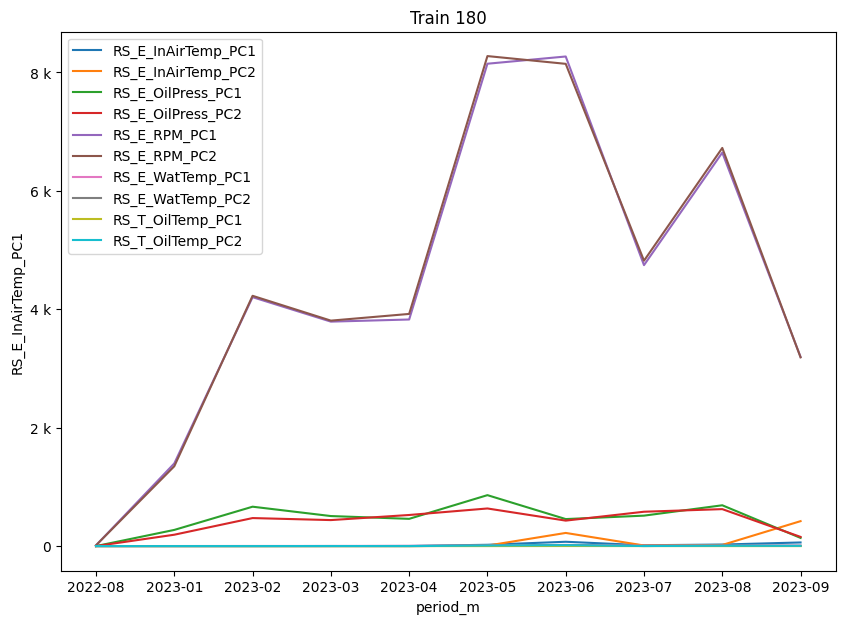

In [274]:
# We pick 1 train and see the outliers of it
train = 180

fig, ax = plt.subplots(figsize=(10, 7))
ax.yaxis.set_major_formatter(ticker.EngFormatter())
for each in sorted(cols_include):
    sns.lineplot(data = dfPlot[dfPlot['mapped_veh_id']==train], x = 'period_m', y = each, label = str(each))\
    .set_title(f'Train {train}') 
plt.legend()
plt.show()

We observe that nunmber of monthly outliers per train. We can observe that the RPM readings are giving huge amount of outliers.

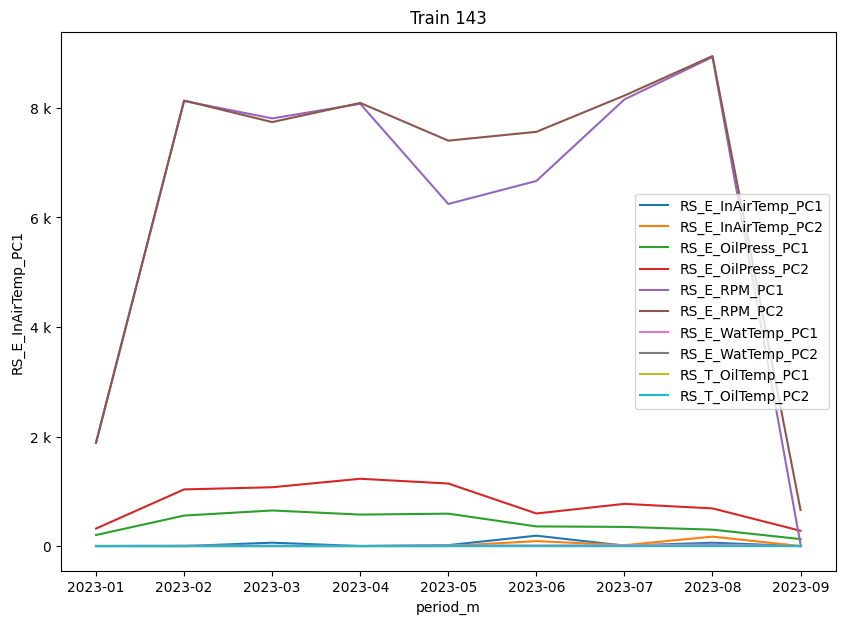

In [275]:
# We pick 1 train and see the outliers of it
train = 143

fig, ax = plt.subplots(figsize=(10, 7))
ax.yaxis.set_major_formatter(ticker.EngFormatter())
for each in sorted(cols_include):
    sns.lineplot(data = dfPlot[dfPlot['mapped_veh_id']==train], x = 'period_m', y = each, label = str(each))\
    .set_title(f'Train {train}') 
plt.legend()
plt.show()

The readings are similar as the previous one

## 3.2. Lower Outliers

In [31]:
#Lower limit
limit_airTemp_inf = limits_table.loc[['lim_inf']].RS_E_InAirTemp_PC1.values[0]
limit_rpm_inf     = limits_table.loc[['lim_inf']].RS_E_RPM_PC1.values[0]
limit_waterT_inf  = limits_table.loc[['lim_inf']].RS_E_WatTemp_PC1.values[0]
limit_oilT_inf    = limits_table.loc[['lim_inf']].RS_T_OilTemp_PC1.values[0]
limit_oilP_inf    = limits_table.loc[['lim_inf']].RS_E_OilPress_PC1.values[0]

print(f' RS_E_InAirTemp threshold:\t {limit_airTemp_inf}'
      f'\n RS_E_RPM threshold:\t\t {limit_rpm_inf}'
      f'\n RS_E_WatTemp threshold:\t {limit_waterT_inf}'
      f'\n RS_T_OilTemp threshold:\t {limit_oilT_inf}'
      f'\n RS_E_OilPress threshold:\t {limit_oilP_inf}')

 RS_E_InAirTemp threshold:	 -17.0
 RS_E_RPM threshold:		 -22.5
 RS_E_WatTemp threshold:	 38.5
 RS_T_OilTemp threshold:	 27.5
 RS_E_OilPress threshold:	 -27.5


In [286]:
# Table showing lower outliers per day and train
outlier_table = limit_table_inf(dfIni, limit_airTemp_inf, limit_rpm_inf, limit_waterT_inf, limit_oilT_inf, limit_oilP_inf)
# Aggregation per month

outlier_table['period_m'] = outlier_table['period'].str[:7]
cols_include = list(set(outlier_table.columns) - {'Unnamed: 0', 'mapped_veh_id', 'timestamps_UTC', 'lat', 'lon','period','period_m'})
#cols_include = cols_include.sort()
agg_dct = {c:'sum' for c in sorted(cols_include)}
dfPlot = outlier_table.groupby(['period_m','mapped_veh_id'],as_index=False).agg(agg_dct)

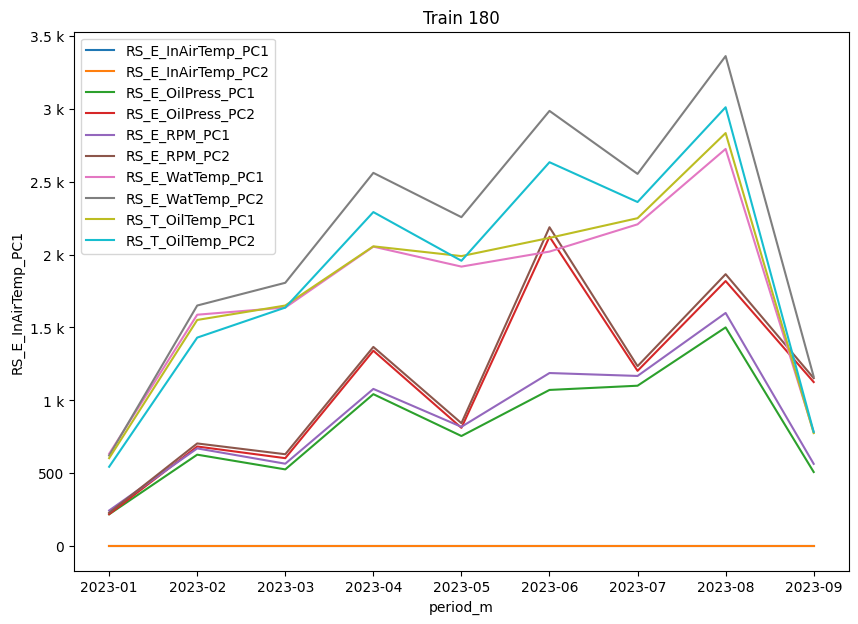

In [280]:
# We pick 1 train and see the outliers of it
train = 180

fig, ax = plt.subplots(figsize=(10, 7))
ax.yaxis.set_major_formatter(ticker.EngFormatter())
for each in sorted(cols_include):
    sns.lineplot(data = dfPlot[dfPlot['mapped_veh_id']==train], x = 'period_m', y = each, label = str(each))\
    .set_title(f'Train {train}') 
plt.legend()
plt.show()

We observe that nunmber of monthly outliers per train. We can observe a upper treand, this could be mean that we need to check out the performance of the sensors

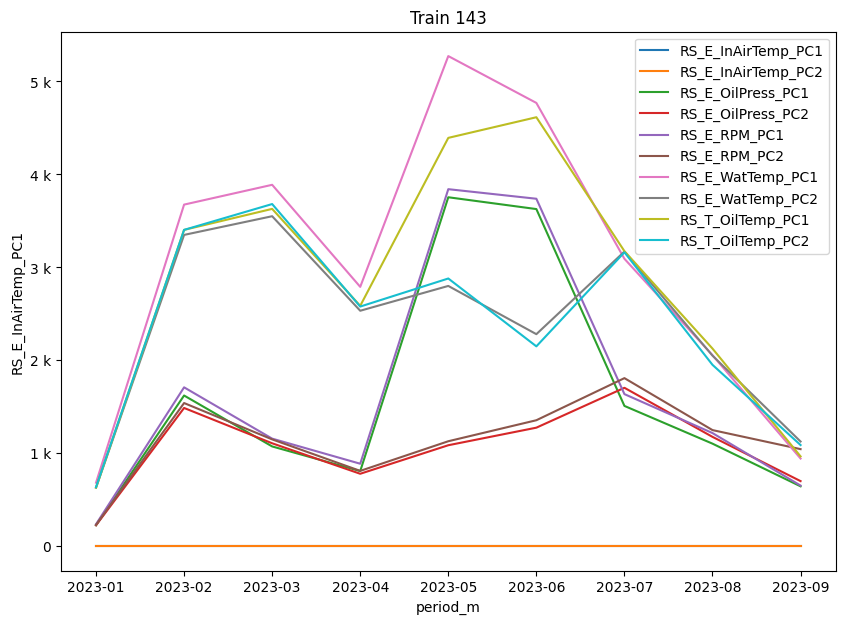

In [281]:
# We pick 1 train and see the outliers of it
train = 143

fig, ax = plt.subplots(figsize=(10, 7))
ax.yaxis.set_major_formatter(ticker.EngFormatter())
for each in sorted(cols_include):
    sns.lineplot(data = dfPlot[dfPlot['mapped_veh_id']==train], x = 'period_m', y = each, label = str(each))\
    .set_title(f'Train {train}') 
plt.legend()
plt.show()

The siutation for the train 143 is similar as the previous one

# 4. Dealing with Outliers

In [304]:
# The outliers are changed by the median

dfIni['RS_E_InAirTemp_PC1'] = np.where(dfIni['RS_E_InAirTemp_PC1'].between(limit_airTemp_inf,limit_airTemp_sup)
                                       , dfIni['RS_E_InAirTemp_PC1'], dfIni['RS_E_InAirTemp_PC1'].median())
dfIni['RS_E_InAirTemp_PC2'] = np.where(dfIni['RS_E_InAirTemp_PC2'].between(limit_airTemp_inf,limit_airTemp_sup)
                                       , dfIni['RS_E_InAirTemp_PC2'] , dfIni['RS_E_InAirTemp_PC2'].median() )

dfIni['RS_E_RPM_PC1'] = np.where(dfIni['RS_E_RPM_PC1'].between(limit_rpm_inf,limit_rpm_sup)
                                       , dfIni['RS_E_RPM_PC1'] , dfIni['RS_E_RPM_PC1'].median() )
dfIni['RS_E_RPM_PC2'] = np.where(dfIni['RS_E_RPM_PC2'].between(limit_rpm_inf,limit_rpm_sup)
                                       , dfIni['RS_E_RPM_PC2'], dfIni['RS_E_RPM_PC2'].median() )

dfIni['RS_E_WatTemp_PC1'] = np.where(dfIni['RS_E_WatTemp_PC1'].between(limit_waterT_inf,limit_waterT_sup)
                                       , dfIni['RS_E_WatTemp_PC1'], dfIni['RS_E_WatTemp_PC1'].median() )
dfIni['RS_E_WatTemp_PC2'] = np.where(dfIni['RS_E_WatTemp_PC2'].between(limit_waterT_inf,limit_waterT_sup)
                                       , dfIni['RS_E_WatTemp_PC2'] , dfIni['RS_E_WatTemp_PC2'].median() )

dfIni['RS_T_OilTemp_PC1'] = np.where(dfIni['RS_T_OilTemp_PC1'].between(limit_oilT_inf,limit_oilT_sup)
                                       , dfIni['RS_T_OilTemp_PC1'], dfIni['RS_T_OilTemp_PC1'].median() )
dfIni['RS_T_OilTemp_PC2'] = np.where(dfIni['RS_E_InAirTemp_PC2'].between(limit_oilT_inf,limit_oilT_sup)
                                       , dfIni['RS_E_InAirTemp_PC2'], dfIni['RS_E_InAirTemp_PC2'].median() )

dfIni['RS_E_OilPress_PC1'] = np.where(dfIni['RS_E_OilPress_PC1'].between(limit_oilP_inf,limit_oilP_sup)
                                       , dfIni['RS_E_OilPress_PC1'], dfIni['RS_E_OilPress_PC1'].median() )
dfIni['RS_E_OilPress_PC2'] = np.where(dfIni['RS_E_OilPress_PC2'].between(limit_oilP_inf,limit_oilP_sup)
                                       , dfIni['RS_E_OilPress_PC2'], dfIni['RS_E_OilPress_PC2'].median() )

/var/folders/1p/dqqj1xs55kn1fkmpx_k6bptw0000gn/T/ipykernel_1405/234281945.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  .plot(ax=ax, kind= 'box', subplots=True, layout=(6,5))


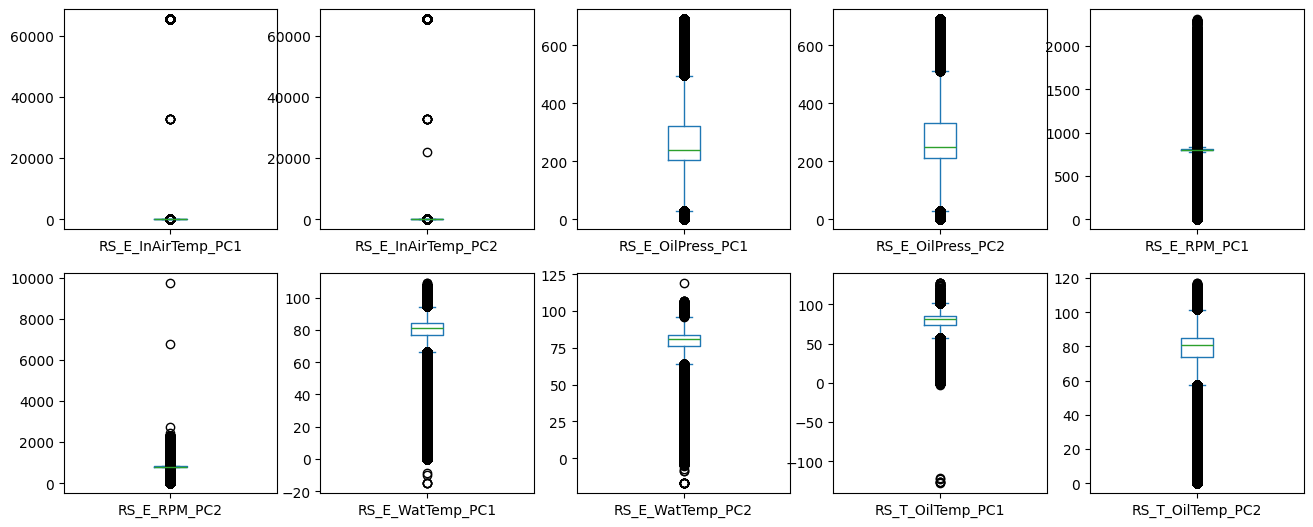

In [310]:
fig = plt.figure(figsize = (16,20))
ax = fig.gca()
(dfIni[list(cols_exclude)].rename(columns=lambda x: str(x)).sort_index(axis=1)
        .plot(ax=ax, kind= 'box', subplots=True, layout=(6,5))
)
plt.show()

The boxplot of the variables have changed, it seems to be that we have outliers, but those are inside the limits that we previously defined

In [315]:
filepath = Path('project_DM/data_dm.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True) 
dfIni.to_csv(filepath, index=False)